# Assignment #1: Performance Benchmarking of Cryptographic Mechanisms



Trabalho por: 
- David Rodrigues up202303949
- Diana Pereira up202304476
- Simão Gomes up202304752

### Index
- [0. Experimental Setup](#experimental-setup) <br>
- [1. (some) Libraries and Modules](#importing-required-libraries-and-modules) (As bibliotecas mais específicas vão sendo importadas conforme são necessárias) <br>
- [A. Generating text files](#a-generating-random-text-files) <br>
- [B. AES](#b-encrypting-and-decrypting-using-aes)<br>
[  B.1. Results](#b1-comparing-aes-results)<br>
- [C. RSA](#c-encrypting-and-decrypting-with-rsa)<br>
[  C.1. Results](#c1-comparing-rsa-results)<br>
- [D. SHA](#d-encryption-and-decryption-with-sha-256)<br>
[  D.1. Results](#d1-comparing-sha-results)<br> 
- [E. Overall Comparison](#e-result-comparison)<br>

## Experimental Setup
- OS: Windows 11
- CPU: Intel Core i7-8550U
- Python 3.12.3
- Cryptography version: 44.0.2

### Importing required libraries and modules

In [ ]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np

### A. Generating random text files

Files with the following sizes:
- Advanced Encription Standard (in bytes): 8, 64, 512, 4096, 32768, 262144, 2097152
- Rivest-Shamir-Adleman (in bytes): 8, 64, 512, 4096, 32768, 262144, 2097152
- Secure Hash Algorithm (in bytes): 2, 4, 8, 16, 32, 64, 128

In [33]:
tamanhosAES = [8,64,512,4096,32768,262144,2097152]
tamanhosRSA = [8,64,512,4096,32768,262144,2097152]
tamanhosSHA = [2,4,8,16,32,64,128]

os.makedirs("Ficheiros",exist_ok=True) #exist_ok para resolver o erro de já existir o diretório "FileExistsError"

def gerar_ficheiros(tamanho,nome):
    with open(f"Ficheiros/{nome}", "wb") as file:
        file.write(os.urandom(tamanho))

for t in tamanhosAES:
    gerar_ficheiros(t, f"AES_{t}.txt")

for t in tamanhosRSA:
    gerar_ficheiros(t, f"RSA_{t}.txt")

for t in tamanhosSHA:
    gerar_ficheiros(t, f"SHA_{t}.txt")

### B. Encrypting and decrypting using AES

In [34]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
from cryptography.hazmat.backends import default_backend


In [35]:
key_AES=os.urandom(32) #key de 256 bits
iv_AES=os.urandom(16) #iv de 128 bits

In [36]:
def encrypt_AES(original,key,iv):
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv))
    encryptor = cipher.encryptor()

    padder = padding.PKCS7(128).padder()
    padded = padder.update(original) + padder.finalize()

    start = time.perf_counter()
    encrypted = encryptor.update(padded) + encryptor.finalize()
    end = time.perf_counter()

    return encrypted,end-start

def decrypt_AES(encrypted,key,iv):
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv))
    decryptor = cipher.decryptor()

    start = time.perf_counter()
    decrypted= decryptor.update(encrypted) + decryptor.finalize()
    unpadder = padding.PKCS7(128).unpadder()
    end = time.perf_counter()

    return unpadder.update(decrypted) + unpadder.finalize(), end-start

We encrypt and decrypt each file multiple times (set to 25) so we can get more accurate results on the time of encryption and decryption for each file/file size

In [37]:
reps = 25

for t in tamanhosAES:
    with open(f"Ficheiros/AES_{t}.txt","rb") as file:
        original = file.read()

    tempo_enc = 0
    tempo_dec = 0
    
    for i in range(reps):
        encrypted, tempo = encrypt_AES(original,key_AES,iv_AES)
        tempo_enc += tempo

        
        original, tempo =decrypt_AES(encrypted,key_AES,iv_AES)
        
        tempo_dec += tempo

    tempo_enc /= reps
    tempo_dec /= reps

    tempo_enc *= 1e6 #converte para microsegundos
    tempo_dec *= 1e6

    print(t ,"bytes:")
    print(f"Encryption time: {tempo_enc: .5f} microssegundos")
    print(f"Decryption time: {tempo_dec: .5f} microssegundos")
    print("")

8 bytes:
Encryption time:  21.09600 microssegundos
Decryption time:  22.81600 microssegundos

64 bytes:
Encryption time:  22.59200 microssegundos
Decryption time:  25.41600 microssegundos

512 bytes:
Encryption time:  16.70800 microssegundos
Decryption time:  17.96400 microssegundos

4096 bytes:
Encryption time:  27.17200 microssegundos
Decryption time:  23.80400 microssegundos

32768 bytes:
Encryption time:  55.23200 microssegundos
Decryption time:  27.86400 microssegundos

262144 bytes:
Encryption time:  1132.26800 microssegundos
Decryption time:  387.18400 microssegundos

2097152 bytes:
Encryption time:  4141.01200 microssegundos
Decryption time:  2333.98800 microssegundos



#### B.1. Comparing AES Results

To get meaningful results we will use multiple files of each size and in the analysis of each we encrypt/decrypt them several times a procedure that will improve the quality, accuracy and raliability of our results this will follow for every mechanism result analysis.

In [57]:
tempos_enc_AES = []
tempos_dec_AES = []

stds_enc_AES = []
stds_dec_AES = []

for t in tamanhosAES:
    tempos_enc = []
    tempos_dec = []

    for _ in range(reps): 
        original = os.urandom(t)

        encrypted, tempo_enc = encrypt_AES(original, key_AES, iv_AES)
        tempos_enc.append(tempo_enc)

        decrypted, tempo_dec = decrypt_AES(encrypted, key_AES, iv_AES)
        tempos_dec.append(tempo_dec)

    tempos_enc_AES.append(np.mean(tempos_enc)*1e6) 
    stds_enc_AES.append(np.std(tempos_enc)*1e6)

    tempos_dec_AES.append(np.mean(tempos_dec)*1e6)
    stds_dec_AES.append(np.std(tempos_dec)*1e6)

print(tempos_enc_AES)
print(tempos_dec_AES)


[27.339999796822667, 10.715999960666522, 11.58800019766204, 20.835999603150412, 68.07199999457225, 398.24400024372153, 4067.0599997974937]
[24.715999752515927, 11.52400000137277, 12.864000018453225, 17.40400039125234, 39.45999953430146, 146.6640003491193, 2347.5759994471446]


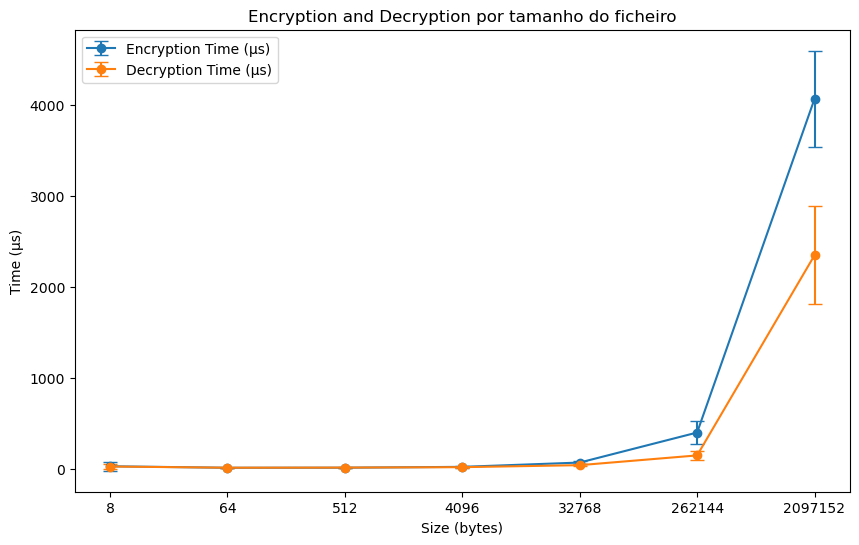

In [60]:
plt.figure(figsize=(10, 6))


tamanho=range(len(tamanhosAES))

plt.errorbar(tamanho, tempos_enc_AES, yerr=stds_enc_AES, fmt='-o', label='Encryption Time (µs)', capsize=5)
plt.errorbar(tamanho, tempos_dec_AES, yerr=stds_dec_AES, fmt='-o', label='Decryption Time (µs)', capsize=5)

plt.xticks(tamanho, tamanhosAES)
plt.xlabel('Size (bytes)')
plt.ylabel('Time (µs)')
plt.title('Encryption and Decryption por tamanho do ficheiro')
plt.legend()
plt.show()

The plot presents the average execution times of the AES algorithm in CBC mode, both when encrypting and decrypting the same file multiple times and when processing different files for each size. <br>
<br>
The AES algorithm performs encryption by dividing the plaintext into fixed-size blocks. The encryption of the first block is carried out using both a secret key and an initialization vector. Subsequently, each ciphertext block is used as input for the encryption of the following plaintext block, creating a sequential dependency throughout the process. <br>
<br>
AES is very fast for small files and it grows almost exponentially as the size of the files increses but it's still a fast mechanism even for larger files. It incresing exponentially follows the trend of block-cyphers. The encryption and decryption times are very similar especially for smaller file sizes.


### C. Encrypting and decrypting with RSA

In [40]:
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import rsa, padding

In [41]:

private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048, backend=default_backend())
public_key = private_key.public_key()

# Função para criptografar com RSA
def encrypt_RSA(original):
    start = time.perf_counter()

    
    aes_key = os.urandom(32)  # 256 bits

    iv = os.urandom(12)  
    cipher_aes = Cipher(algorithms.AES(aes_key), modes.GCM(iv), backend=default_backend())
    encryptor = cipher_aes.encryptor()
    ciphertext = encryptor.update(original) + encryptor.finalize()
    tag = encryptor.tag

    # Criptografar a chave AES com RSA
    encrypted_key = public_key.encrypt(
        aes_key,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )

    end = time.perf_counter()
    return encrypted_key, iv, ciphertext, tag, end - start

# Função para descriptografar com RSA
def decrypt_RSA(encrypted_key, iv, ciphertext, tag):
    start = time.perf_counter()

    # Descriptografar a chave AES com RSA
    aes_key = private_key.decrypt(
        encrypted_key,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )

    # Descriptografar os dados com AES (Modo GCM)
    cipher_aes = Cipher(algorithms.AES(aes_key), modes.GCM(iv, tag), backend=default_backend())
    decryptor = cipher_aes.decryptor()
    original = decryptor.update(ciphertext) + decryptor.finalize()

    end = time.perf_counter()
    return original, end - start

# Teste


for t in tamanhosRSA:
    with open(f"Ficheiros/RSA_{t}.txt", "rb") as file:
        original = file.read()

    tempo_enc = 0
    tempo_dec = 0

    for i in range(reps):
        encrypted_key, iv, encrypted, tag, tempo = encrypt_RSA(original)
        tempo_enc += tempo

        decrypted, tempo = decrypt_RSA(encrypted_key, iv, encrypted, tag)
        tempo_dec += tempo

    tempo_enc /= reps
    tempo_dec /= reps

    tempo_enc *= 1e6  # converte para microsegundos
    tempo_dec *= 1e6


    print(t, "bytes: ")
    print(f"encryption time: {tempo_enc:.2f} microssegundos")
    print(f"decryption time: {tempo_dec:.2f} microssegundos")
    print("")


8 bytes: 
encryption time: 122.78 microssegundos
decryption time: 678.64 microssegundos

64 bytes: 
encryption time: 124.09 microssegundos
decryption time: 687.64 microssegundos

512 bytes: 
encryption time: 250.10 microssegundos
decryption time: 1177.28 microssegundos

4096 bytes: 
encryption time: 247.88 microssegundos
decryption time: 1235.76 microssegundos

32768 bytes: 
encryption time: 188.45 microssegundos
decryption time: 863.47 microssegundos

262144 bytes: 
encryption time: 437.80 microssegundos
decryption time: 1447.99 microssegundos

2097152 bytes: 
encryption time: 2816.94 microssegundos
decryption time: 3425.38 microssegundos



#### C.1. Comparing RSA results

In [42]:
tempos_enc_RSA = []
tempos_dec_RSA = []

stds_enc_RSA = []
stds_dec_RSA = []

for t in tamanhosRSA:
    tempos_enc = []
    tempos_dec = []

    for _ in range(reps): 
        original = os.urandom(t)

        encrypted_key, iv, encrypted, tag, tempo_enc = encrypt_RSA(original)
        tempos_enc.append(tempo_enc)

        decrypted, tempo_dec = decrypt_RSA(encrypted_key, iv, encrypted, tag)
        tempos_dec.append(tempo_dec)

    tempos_enc_RSA.append(np.mean(tempos_enc))
    stds_enc_RSA.append(np.std(tempos_enc))

    tempos_dec_RSA.append(np.mean(tempos_dec))
    stds_dec_RSA.append(np.std(tempos_dec))

print(tempos_enc_RSA)
print(tempos_dec_RSA)

[0.00016890799946850166, 0.00010301999966031871, 0.00011881199985509738, 9.955999979865737e-05, 0.0001103720000537578, 0.00019601600026362577, 0.0022785000002477317]
[0.0007625439995899797, 0.0006928759998118039, 0.000705912000121316, 0.000667888000025414, 0.0006682040001032874, 0.0007525119998899754, 0.0027109199996630195]


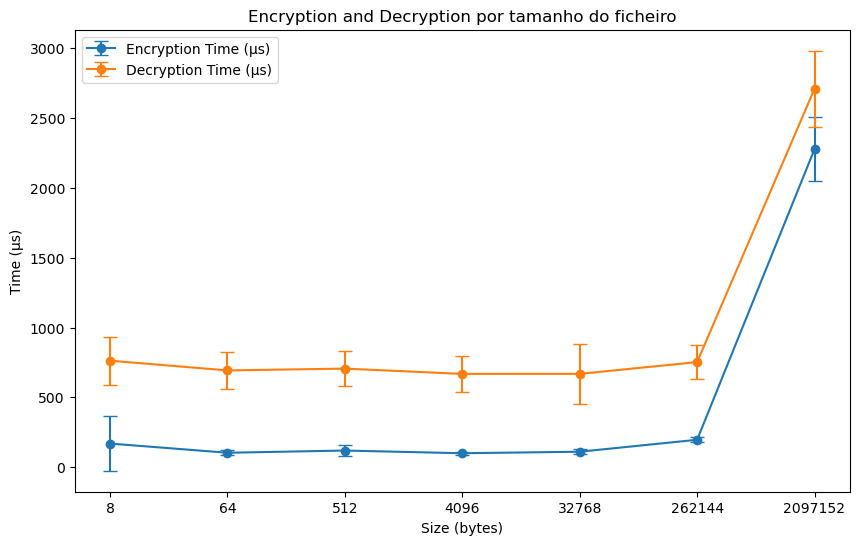

In [43]:
plt.figure(figsize=(10, 6))

mean_enc = [x * 1e6 for x in tempos_enc_RSA]
mean_dec = [x * 1e6 for x in tempos_dec_RSA]
std_enc = [x * 1e6 for x in stds_enc_RSA]
std_dec = [x * 1e6 for x in stds_dec_RSA]

tamanho=range(len(tamanhosRSA))

plt.errorbar(tamanho, mean_enc, yerr=std_enc, fmt='-o', label='Encryption Time (µs)', capsize=5)
plt.errorbar(tamanho, mean_dec, yerr=std_dec, fmt='-o', label='Decryption Time (µs)', capsize=5)

plt.xticks(tamanho, tamanhosRSA)
plt.xlabel('Size (bytes)')
plt.ylabel('Time (µs)')
plt.title('Encryption and Decryption por tamanho do ficheiro')
plt.legend()
plt.show()

The RSA algorithm is an asymmetric cryptographic method that utilizes exponentiation and modular arithmetic, operating with a pair of public and private keys. For encryption, the sender uses the recipient’s public key to generate the ciphertext. Decryption is then performed by the recipient using their private key to retrieve the original plaintext message.

The observed differences in encryption and decryption times within RSA are mainly due to variations in exponentiation complexity, key sizes, and the underlying modular arithmetic involved.


### D. Encryption and Decryption with SHA-256

In [44]:
def hashing_SHA(original):
    start = time.perf_counter()
    digest = hashes.Hash(hashes.SHA256(), backend=default_backend())
    digest.update(original)
    end = time.perf_counter()

    return digest.finalize(), end-start


for t in tamanhosSHA:
    with open(f"Ficheiros/SHA_{t}.txt","rb") as file:
        original = file.read()

    tempo_hash = 0
    
    for i in range(reps):
        f,tempo=hashing_SHA(original)
        tempo_hash += tempo

    tempo_hash /= reps

    tempo_hash *= 1e6 #converte para microsegundos

    print(t , "bytes:")
    print(f"hash generation time:{tempo_hash: .2f} microssegundos")
    print("")

2 bytes:
hash generation time: 12.99 microssegundos

4 bytes:
hash generation time: 14.85 microssegundos

8 bytes:
hash generation time: 8.73 microssegundos

16 bytes:
hash generation time: 7.94 microssegundos

32 bytes:
hash generation time: 8.97 microssegundos

64 bytes:
hash generation time: 14.51 microssegundos

128 bytes:
hash generation time: 18.90 microssegundos



#### D.1. Comparing SHA results

In [45]:
tempos_hashing_SHA = []
stds_hashing_SHA = []

for t in tamanhosSHA:
    tempos_hash = []

    for _ in range(reps): 
        original = os.urandom(t)

        f,tempo=hashing_SHA(original)
        tempos_hash.append(tempo)

    tempos_hashing_SHA.append(np.mean(tempos_hash))
    stds_hashing_SHA.append(np.std(tempos_hash))

print(tempos_hashing_SHA)

[1.2848000624217093e-05, 8.18399988929741e-06, 7.928000268293545e-06, 7.819999445928261e-06, 7.83599985879846e-06, 8.052000048337504e-06, 8.119999984046445e-06]


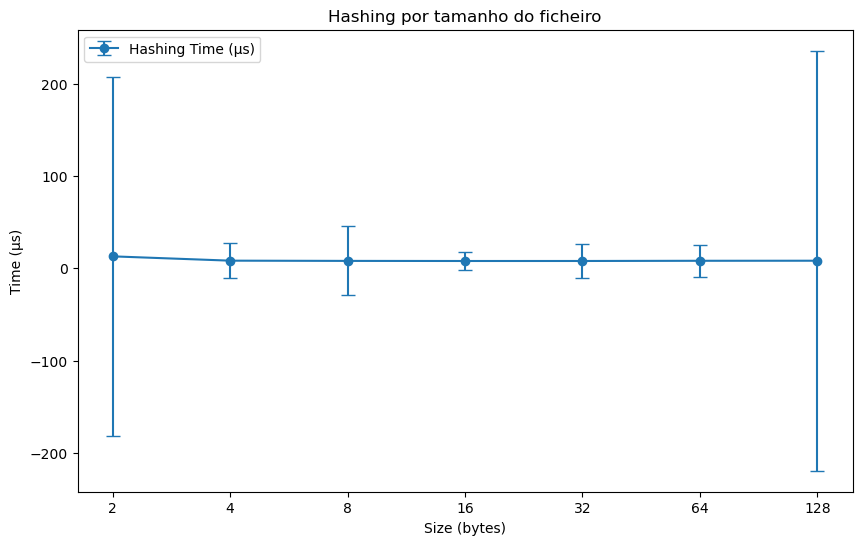

In [46]:
plt.figure(figsize=(10, 6))

mean_hash = [x * 1e6 for x in tempos_hashing_SHA]
std_hash = [x * 1e6 for x in stds_hashing_SHA]

tamanho=range(len(tamanhosSHA))

plt.errorbar(tamanho, mean_hash, yerr=std_enc, fmt='-o', label='Hashing Time (µs)', capsize=5)

plt.xticks(tamanho, tamanhosSHA)
plt.xlabel('Size (bytes)')
plt.ylabel('Time (µs)')
plt.title('Hashing por tamanho do ficheiro')
plt.legend()
plt.show()

The plot shows AES encryption time and SHA digest generation through several files of different sizes. We can state that AES encryption takes more time than SHA-256 digest generation, especially when takling about lower file sizes.
The difference in processing time between AES encryption and SHA-256 digest generation can be attributed to the fundamental operations each algorithm performs. AES encryption involves multiple rounds of substitutions, permutations, and key-dependent transformations to ensure data confidentiality, which requires more computational effort, especially for smaller files where overhead (such as key scheduling) becomes more significant relative to the data size. In contrast, SHA-256 is designed for fast hashing, performing a fixed set of operations (compression functions and bitwise operations) optimized for speed, even if it also processes data in blocks. Since hashing does not require reversible transformations or key management, it generally executes faster than encryption, particularly for smaller files where AES's setup time and complex rounds are not amortized over large amounts of data.

### E. Result Comparison

#### Comparison between AES encryption and RSA encryption

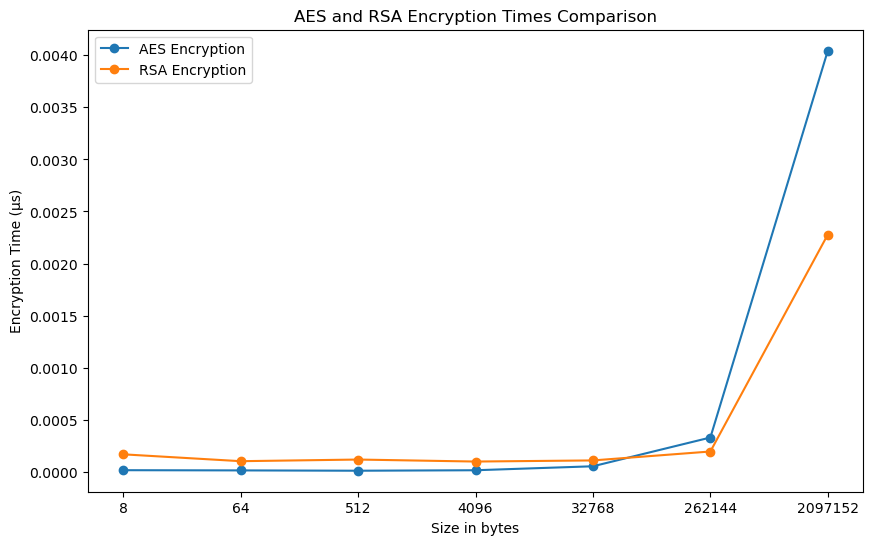

In [47]:
plt.figure(figsize=(10, 6))

tamanho=range(len(tamanhosAES))

plt.plot(tamanho, tempos_enc_AES, marker='o', label='AES Encryption')
plt.plot(tamanho, tempos_enc_RSA, marker='o', label='RSA Encryption')

plt.xticks(tamanho, tamanhosAES)
plt.xlabel("Size in bytes")
plt.ylabel("Encryption Time (μs)")
plt.title("AES and RSA Encryption Times Comparison")
plt.legend()
plt.show()

We can tell AES is much faster and RSA can not work so well for large file sizes. However RSA has a larger decryption time and if we want to secure a smaller file maybe we should choose RSA. But if we want fast encryption or a largar file, we should use AES.


#### Comparison between AES encryption and SHA digest generation

In [54]:
from cryptography.hazmat.primitives import padding

tempos_enc_AES_2 = []

for t in tamanhosSHA:
    tempos_enc = []

    for _ in range(reps): 
        original = os.urandom(t)

        encrypted, tempo_enc = encrypt_AES(original, key_AES, iv_AES)
        tempos_enc.append(tempo_enc)


    tempos_enc_AES_2.append(np.mean(tempos_enc))


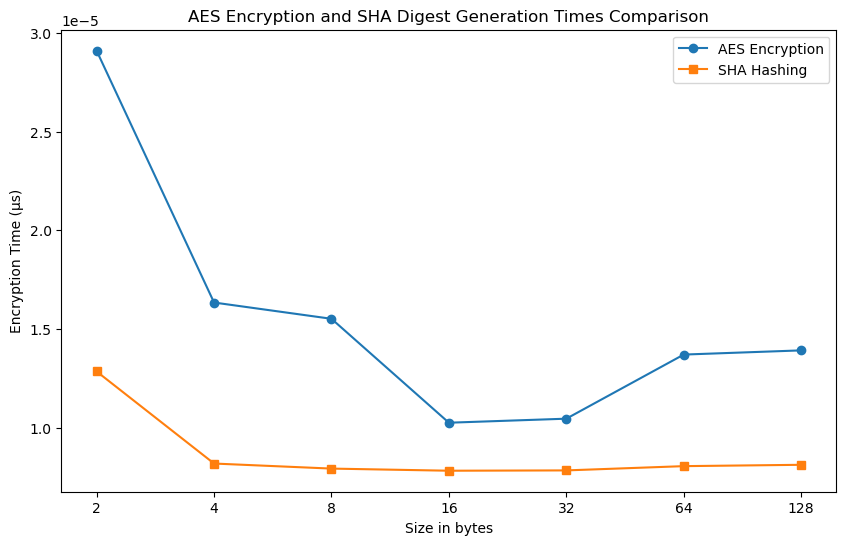

In [55]:

plt.figure(figsize=(10, 6))
tamanho=range(len(tamanhosSHA))

plt.plot(tamanho, tempos_enc_AES_2, marker='o', label='AES Encryption')
plt.plot(tamanho, tempos_hashing_SHA, marker='s', label='SHA Hashing')


plt.xticks(tamanho, tamanhosSHA)
plt.xlabel("Size in bytes")
plt.ylabel("Encryption Time (μs)")
plt.title("AES Encryption and SHA Digest Generation Times Comparison")
plt.legend()
plt.show()

AES is a symmetric encryption algorithm used to securely encrypt and decrypt data, ensuring confidentiality with fast performance. SHA is a cryptographic hash function that generates a fixed-size digest for data integrity verification, operating one-way without a key. While AES protects data secrecy, SHA ensures tamper detection, and they are often used together AES encrypts files while SHA verifies their integrity.